In [8]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../../Data_Sets/p2/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from IPython import display
from ClassPerceptron import Perceptron
from sklearn import preprocessing
import grafica as gr

# Ejercicio 1

In [22]:
data_hawks = pd.read_csv(DATOS_DIR + "hawks.csv",sep=";", encoding="latin1")
#quiero ver los tipos de datos que hay en cada columna
data_hawks.dtypes
print(data_hawks.columns.tolist())


['Año', 'Especie', 'Ala', 'Peso', 'Cola', 'Hallux']


## a) 
 Calcule la correlación lineal entre los atributos Ala y Cola. Indique la intensidad de la correlación (no hay correlación/débil/fuerte) y el tipo (positiva/negativa)

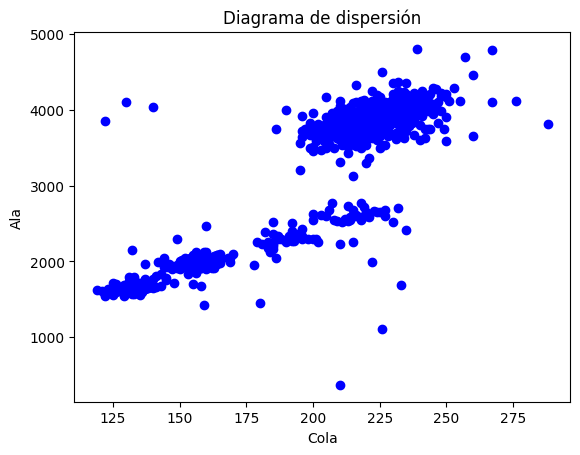

Coeficiente de correlación: 0.8998883674343952


In [23]:
# Diagrama de dispersión Cola vs Ala
plt.plot(data_hawks['Cola'], data_hawks['Ala'], 'ob')
plt.xlabel('Cola')
plt.ylabel('Ala')
plt.title('Diagrama de dispersión')
plt.show()

# Correlación entre ambas
correlacion1 = data_hawks['Cola'].corr(data_hawks['Ala'])
print("Coeficiente de correlación:", correlacion1)


### Tiene coeficiente de correlacion positivo de tipo fuerte

## b)
Complete el cuadro con los valores del atributo Hallux antes y después de normalizarlos utilizando media y desvío.

| **Medida** | **Sin Normalizar** | **Normalizado** |
|:----------:|:------------------:|:---------------:|
|   Máximo   |                    |                 |
|     Q1     |                    |                 |
|   Mínimo   |                    |                 |
|       Q2        |         | 
|       Q3        |         |     |
|       RIC       |         |   |
| Bigote Inferior |         |   |
| Bigote Superior |         |  |

In [36]:
NormalizedData_hawks = (data_hawks['Hallux'] - data_hawks['Hallux'].mean()) / data_hawks['Hallux'].std()
normal_max = data_hawks.max()
normalized_max = NormalizedData_hawks.max()
print("Valor máximo sin normalizar:", normal_max['Hallux'])
print("Valor máximo normalizado:", normalized_max)
normalized_min = NormalizedData_hawks.min()
normal_min = data_hawks.min()
print("Valor mínimo sin normalizar:", normal_min['Hallux'])
print("Valor mínimo normalizado:", normalized_min)
print("Q1 sin normalizar: ", data_hawks['Hallux'].quantile(0.25))
print("Q1 normalizado: ", NormalizedData_hawks.quantile(0.25))
print("Q2 sin normalizar: ", data_hawks['Hallux'].quantile(0.5))
print("Q2 normalizado: ", NormalizedData_hawks.quantile(0.5))
print("Q3 sin normalizar: ", data_hawks['Hallux'].quantile(0.75))
print("Q3 normalizado: ", NormalizedData_hawks.quantile(0.75))
normal_RIC = data_hawks['Hallux'].quantile(0.75) - data_hawks['Hallux'].quantile(0.25)
normalized_RIC = NormalizedData_hawks.quantile(0.75) - NormalizedData_hawks.quantile(0.25)
print("RIC sin normalizar: ", normal_RIC)
print("RIC normalizado: ", normalized_RIC)
Bigote_superior_normal = data_hawks['Hallux'].quantile(0.75) + 1.5 * normal_RIC
Bigote_superior_normalized = NormalizedData_hawks.quantile(0.75) + 1.5 * normalized_RIC
print("Bigote superior sin normalizar: ", Bigote_superior_normal)
print("Bigote superior normalizado: ", Bigote_superior_normalized)
Bigote_inferior_normal = data_hawks['Hallux'].quantile(0.25) - 1.5 * normal_RIC
Bigote_inferior_normalized = NormalizedData_hawks.quantile(0.25) - 1.5 * normalized_RIC
print("Bigote inferior sin normalizar: ", Bigote_inferior_normal)
print("Bigote inferior normalizado: ", Bigote_inferior_normalized)


Valor máximo sin normalizar: 3414
Valor máximo normalizado: 9.716759278095767
Valor mínimo sin normalizar: 95
Valor mínimo normalizado: -0.6123773075584721
Q1 sin normalizar:  152.0
Q1 normalizado:  -0.43498629057073734
Q2 sin normalizar:  295.0
Q2 normalizado:  0.01004731345112351
Q3 sin normalizar:  315.0
Q3 normalizado:  0.07228977555208307
RIC sin normalizar:  163.0
RIC normalizado:  0.5072760661228204
Bigote superior sin normalizar:  559.5
Bigote superior normalizado:  0.8332038747363136
Bigote inferior sin normalizar:  -92.5
Bigote inferior normalizado:  -1.1959003897549678


### I. Verdadero ya que el valor es cercano a 0
### II. Verdadero ya que el max_normalizado = 9.71
### III. Falso, deberia ser mayor a 804mm
### IV. Falso
### V. No, no es atipico, el bigote minimo normal llega a 92.5

# Ejercicio 2

In [53]:
data_globos = pd.read_csv(DATOS_DIR + "globos.csv",sep=",")
data_globos.dtypes
print(data_globos.columns.tolist())

['Color', 'Tamanio', 'Se_estira?', 'Edad', 'Inflado?']


In [54]:
#mapeo = {"Color": {"Amarillo": 0, "Rojo": 1}, "Se_estira?": {"No": 0, "Si": 1},
#"Edad": {"Adulto": 1, "Nene": 0}, "Tamanio": {"Chico": 0, "Grande": 1, "Mediano": 0.5}}

#data_globos.replace(mapeo, inplace=True)
# Color
NewColorColumn = pd.get_dummies(data_globos['Color'], prefix= 'Color', drop_first=True).astype(int)

data_globos = pd.concat([NewColorColumn, data_globos], axis=1)
data_globos.drop(['Color'],axis=1, inplace=True)


# Tamanio
tamanioMap ={
	"Tamanio": {
		"Chico": 0,
		"Mediano": 0.5,
		"Grande": 1
	}
}
data_globos.replace(tamanioMap, inplace=True)

# SeEstira?
NewSeEstiraColumn = pd.get_dummies(data_globos['Se_estira?'], prefix= 'Se_estira?', drop_first=True).astype(int)
data_globos = pd.concat([NewSeEstiraColumn, data_globos], axis=1)
data_globos.drop(['Se_estira?'],axis=1, inplace=True)

# Edad
NewEdadColumn = pd.get_dummies(data_globos['Edad'], prefix= 'Edad', drop_first=False).astype(int)
NewEdadColumn.drop('Edad_Nene', axis=1, inplace=True)
data_globos = pd.concat([NewEdadColumn, data_globos], axis=1)
data_globos.drop(['Edad'],axis=1, inplace=True)

# Inflado?: Si bien no lo pide lo voy a necesitar para entrenar el perceptron
NewInfladoColumn = pd.get_dummies(data_globos['Inflado?'], prefix= 'Inflado?', drop_first=True).astype(int)
data_globos = pd.concat([NewInfladoColumn, data_globos], axis=1)
data_globos.drop(['Inflado?'],axis=1, inplace=True)

data_globos

/tmp/ipykernel_22701/1068244996.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_globos.replace(tamanioMap, inplace=True)


,Inflado?_Si,Edad_Adulto,Se_estira?_Si,Color_Rojo,Tamanio
0,1,1,1,0,0.0
1,1,0,1,0,0.0
2,0,1,0,0,0.0
3,0,0,0,0,0.0
4,1,1,1,0,1.0
5,1,0,1,0,1.0
6,0,1,0,0,0.5
7,0,0,0,0,0.5
8,1,1,1,1,0.0
9,0,0,1,1,0.0


## a)
 Indique cuáles de los siguientes perceptrones pueden clasificar correctamente todos los ejemplos normalizados del archivo Globos.csv

| Configuración | w(Color) | w(Tamaño) | w(Se_estira?) | w(Edad) | b       |
|---------------|----------|-----------|---------------|---------|---------|
| Perceptrón 1  | 0.050    | 0.006     | -0.068        | -0.047  | 0.005   |
| Perceptrón 2  | -0.494   | -0.003    | 0.722         | 0.489   | -0.4943 |
| Perceptrón 3  | 0.060    | 0.004     | 0.1278        | 0.021   | -0.1132 |
| Perceptrón 4  | 0.296    | 0.026     | -0.576        | -0.287  | 0.371   |
| Perceptrón 5  | 0.994    | 0.006     | -1.466        | -0.989  | 0.988   |



In [59]:
perceptrons = [
    {
        "w_color": 0.050,
        "w_tamanio": 0.006,
        "w_se_estira": -0.068,
        "w_edad": -0.047,
        "b": 0.005
    },
    {
        "w_color": -0.494,
        "w_tamanio": -0.003,
        "w_se_estira": 0.722,
        "w_edad": 0.489,
        "b": -0.4943
    },
    {
        "w_color": 0.06,
        "w_tamanio": 0.004,
        "w_se_estira": 0.1278,
        "w_edad": 0.021,
        "b": -0.1132
    },
    {
        "w_color": 0.296,
        "w_tamanio": 0.026,
        "w_se_estira": -0.576,
        "w_edad": -0.287,
        "b": 0.371
    },
    {
        "w_color": 0.994,
        "w_tamanio": 0.006,
        "w_se_estira": -1.466,
        "w_edad": -0.989,
        "b": 0.988
    }
]

for i, p in enumerate(perceptrons):
    incorrect = 0
    for idx, row in data_globos.iterrows():
        z = (p["w_color"] * row["Color_Rojo"] +
			p["w_tamanio"] * row["Tamanio"] +
			p["w_se_estira"] * row["Se_estira?_Si"] +
			p["w_edad"] * row["Edad_Adulto"] -
			p["b"])
        a = 1 if (z >= 0) else 0
        data_globos.at[idx, f'Perceptron_{i+1}'] = a
        if a != row["Inflado?_Si"]:
            incorrect += 1
    print(f"Perceptron {i+1}: {incorrect} errores de {len(data_globos)} ejemplos.")

# Ninguno clasifica todo correctamente, pero el que menos errores tiene es el perceptron 4 con 6 errores.

Perceptron 1: 10 errores de 16 ejemplos.
Perceptron 2: 8 errores de 16 ejemplos.
Perceptron 3: 10 errores de 16 ejemplos.
Perceptron 4: 6 errores de 16 ejemplos.
Perceptron 5: 8 errores de 16 ejemplos.


## b)
### Los peores perceptrones son el 1 y el 3

# Ejercicio 3

## a)
 La Tabla 1 muestra información correspondiente de pacientes para determinar si deben realizarse un examen médico en función de su edad, altura y riesgo médico.
| EDAD | RIESGO | EXAMEN |
|------|--------|--------|
| 55   | ALTO   | SI     |
| 56   | MEDIO  | NO     |
| 58   | MEDIO  | SI     |
| 56   | BAJO   | NO     |
| 59   | BAJO   | SI     |
| 57   | MEDIO  | SI     |
| 60   | BAJO   | SI     |
| 53   | ALTO   | NO     |
| 59   | MEDIO  | SI     |

 Luego de la numerización se calculó el coeficiente de correlación lineal entre los atributos EDAD y RIESGO y se obtuvo como resultado -0.71. ¿Cómo debe interpretarse este valor?
### Rta: Este valor se puede interpretar como que a medida que la edad aumenta el riesgo disminuye, siguiendo una relación lineal débil.

## b)
 Luego de numerizar el atributo RIESGO y de normalizar los atributos de manera lineal entre 0 y 1, los ejemplos fueron utilizados para entrenar un perceptrón capaz de predecir correctamente el atributo EXAMEN. Los pesos obtenidos fueron los siguientes:

### W(EDAD) = 0.0807 W(RIESGO) = 0.074 Sesgo o bias = -0.0742

 ¿Cuál será la respuesta del perceptrón para los siguientes valores?

### (EDAD, RIESGO) = (50, BAJO), (51, MEDIO), (54, ALTO)

In [64]:
perceptron = {
	"w_edad": 0.0807,
	"w_riesgo": -0.074,
	"bias": -0.0742
}
ejemplos = [
    {"Edad": 51, "Riesgo": 2},
    {"Edad": 50, "Riesgo": 1},
    {"Edad": 54, "Riesgo": 3}
]
for ej in ejemplos:
    z = (perceptron["w_edad"] * ej["Edad"] +
            perceptron["w_riesgo"] * ej["Riesgo"] +
            perceptron["bias"])
    a = 1 if (z >= 0) else 0
    print(f"Para (Edad={ej['Edad']}, Riesgo={ej['Riesgo']}) => EXAMEN = {a}")

Para (Edad=51, Riesgo=2) => EXAMEN = 1
Para (Edad=50, Riesgo=1) => EXAMEN = 1
Para (Edad=54, Riesgo=3) => EXAMEN = 1


# Ejercicio 4

## a)
Utilice el archivo *drug_train.csv* para entrenar un perceptrón que sea capaz de predecir si el tipo de
fármaco que se debe administrar a un paciente afectado de rinitis alérgica es el habitual (suministro de DrugY) o no.

In [65]:
data_drugs_train = pd.read_csv(DATOS_DIR + "drugs_train.csv",sep=",")
data_drugs_train.dtypes
print(data_drugs_train.columns.tolist())

['Age', 'Sex', 'BP', 'Cholesterol', 'Na', 'K', 'Drug']


In [75]:
def label_encoding_preprocess_data(data: pd.DataFrame) -> pd.DataFrame:
    data = data.copy()  # Evita modificar el DataFrame original

    # Codificación one-hot para 'Sex'
    NewSexColumn = pd.get_dummies(
        data['Sex'], prefix='Sex', drop_first=True
    ).astype(int)
    data = pd.concat([NewSexColumn, data], axis=1)
    data.drop(['Sex'], axis=1, inplace=True)

    # Mapeo de valores para BP y Cholesterol
    Mapeo = {
        "BP": {"LOW": 0, "NORMAL": 1, "HIGH": 2},
        "Cholesterol": {"NORMAL": 0, "HIGH": 1}
    }
    data.replace(Mapeo, inplace=True)

    return data

# Preprocesar datos
preprocessed_data = label_encoding_preprocess_data(data_drugs_train)

# Preparar datos para el Perceptrón
X_train = preprocessed_data[['Age', 'Sex_M', 'BP', 'Cholesterol']].values
Y_train = (preprocessed_data["Drug"] == "drugY").astype(int)

# Entrenar Perceptrón
ppn = Perceptron(alpha=0.05, n_iter=100, random_state=1)
ppn.fit(X_train, Y_train)

print(f"Pesos: {ppn.w_}, Bias: {ppn.b_}")

Pesos: [  2.467022   -12.97967551  -1.69988563   1.80233257], Bias: 14.946755890817192


## b) 
Luego utilice el archivo drug_test.csv para medir la calidad del modelo.

In [84]:
data_drugs_test = pd.read_csv(DATOS_DIR + "drugs_test.csv",sep=",")
data_drugs_test.dtypes
preprocessed_test_data = label_encoding_preprocess_data(data_drugs_test)
X_test = preprocessed_test_data[['Age', 'Sex_M', 'BP', 'Cholesterol']].values
Y = ppn.predict(X_test)
T_test = (preprocessed_test_data["Drug"] == "drugY").astype(int)
efectividad = 100.0*np.sum(Y==T_test)/len(Y)
print(f"Efectividad del perceptrón en el conjunto de prueba: {efectividad:.2f}%")

Efectividad del perceptrón en el conjunto de prueba: 45.00%


/tmp/ipykernel_22701/1992735514.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(Mapeo, inplace=True)


## c)
Resuelva el problema:

● Numerizando los atributos ordinales utilizando dos representaciones diferentes: como entero único
y de manera binaria (dummy).

● Normalizando de diferentes formas: Sin normalizar, normalización lineal, normalización con media y
desvío

### Numerizacion como entero (mapeo)

In [89]:
#la numerizacion entera la hice en el inciso anterior 
#Normalizacion lineal
X_train_lin = (X_train - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
X_test_lin = (X_test - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
ppn.fit(X_train_lin, Y_train)
Y_lin = ppn.predict(X_test_lin)
efectividad_lin = 100.0*np.sum(Y_lin==T_test)/len(Y_lin)
print(f"Efectividad del perceptrón con normalización lineal en el conjunto de prueba: {efectividad_lin:.2f}%")

# Normalización con media y desvío
X_train_std = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test_std = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)
ppn.fit(X_train_std, Y_train)
Y_std = ppn.predict(X_test_std)
efectividad_std = 100.0*np.sum(Y_std==T_test)/len(Y_std)
print(f"Efectividad del perceptrón con normalización media y desvío en el conjunto de prueba: {efectividad_std:.2f}%")

Efectividad del perceptrón con normalización lineal en el conjunto de prueba: 45.00%
Efectividad del perceptrón con normalización media y desvío en el conjunto de prueba: 42.50%


### Numerizacion de manera binaria

In [96]:
def one_hot_preprocess_data(train: pd.DataFrame, test: pd.DataFrame):
    data = pd.concat([train, test], axis=0)  # unir filas
    categorical_cols = ['Sex', 'BP', 'Cholesterol']
    dummies = pd.get_dummies(data[categorical_cols], drop_first=False).astype(int)
    data = data.drop(columns=categorical_cols)
    data = pd.concat([dummies, data], axis=1)

    # separar nuevamente en train y test
    train_oh = data.iloc[:len(train), :].copy()
    test_oh  = data.iloc[len(train):, :].copy()
    return train_oh, test_oh

train_data_oh, test_data_oh = one_hot_preprocess_data(data_drugs_train, data_drugs_test)

# --- Definir X y T ---
X_train = train_data_oh.drop(columns=['Drug']).values
Y_train = (train_data_oh["Drug"] == "drugY").astype(int)

X_test = test_data_oh.drop(columns=['Drug']).values
T_test = (test_data_oh["Drug"] == "drugY").astype(int)

ppn = Perceptron(alpha=0.05, n_iter=100, random_state=1)

#Sin normalizar
ppn.fit(X_train, Y_train)
Y = ppn.predict(X_test)
efectividad = 100.0*np.sum(Y==T_test)/len(Y)
print(f"Efectividad del perceptrón sin normalizar en el conjunto de prueba: {efectividad:.2f}%")

#normalización lineal
X_train_lin = (X_train - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
X_test_lin = (X_test - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
ppn.fit(X_train_lin, Y_train)
Y_lin = ppn.predict(X_test_lin)
efectividad_lin = 100.0*np.sum(Y_lin==T_test)/len(Y_lin)
print(f"Efectividad del perceptrón con normalización lineal en el conjunto de prueba: {efectividad_lin:.2f}%")

# Normalización con media y desvío
X_train_std = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test_std = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)
ppn.fit(X_train_std, Y_train)
Y_std = ppn.predict(X_test_std)
efectividad_std = 100.0*np.sum(Y_std==T_test)/len(Y_std)
print(f"Efectividad del perceptrón con normalización media y desvío en el conjunto de prueba: {efectividad_std:.2f}%")

Efectividad del perceptrón sin normalizar en el conjunto de prueba: 45.00%
Efectividad del perceptrón con normalización lineal en el conjunto de prueba: 55.00%
Efectividad del perceptrón con normalización media y desvío en el conjunto de prueba: 55.00%


/tmp/ipykernel_22701/1478806220.py:31: RuntimeWarning: invalid value encountered in divide
  X_train_lin = (X_train - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
/tmp/ipykernel_22701/1478806220.py:32: RuntimeWarning: divide by zero encountered in divide
  X_test_lin = (X_test - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
/tmp/ipykernel_22701/1478806220.py:32: RuntimeWarning: invalid value encountered in divide
  X_test_lin = (X_test - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
/tmp/ipykernel_22701/1478806220.py:39: RuntimeWarning: invalid value encountered in divide
  X_train_std = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
/tmp/ipykernel_22701/1478806220.py:40: RuntimeWarning: divide by zero encountered in divide
  X_test_std = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)
/tmp/ipykernel_22701/1478806220.py:40: RuntimeWarning: invalid value encountered in divide
  X_test_std = (X_test - X_train.m

In [99]:
def one_hot_preprocess_data(data: pd.DataFrame) -> pd.DataFrame:
    categorical_cols = ['Sex', 'BP', 'Cholesterol']
    dummies = pd.get_dummies(data[categorical_cols], drop_first=False).astype(int)
    data = data.drop(columns=categorical_cols)
    data = pd.concat([dummies, data], axis=1)
    return data

train_data_oh = one_hot_preprocess_data(data_drugs_train)
test_data_oh  = one_hot_preprocess_data(data_drugs_test)

# --- Definir X y T ---
X_train = train_data_oh.drop(columns=['Drug']).values
Y_train = (train_data_oh["Drug"] == "drugY").astype(int)

X_test = test_data_oh.drop(columns=['Drug']).values
T_test = (test_data_oh["Drug"] == "drugY").astype(int)

ppn = Perceptron(alpha=0.05, n_iter=100, random_state=1)

# --- CASO 1: Sin normalizar ---
ppn.fit(X_train, Y_train)
Y_test_raw = ppn.predict(X_test)
efectividad_raw = 100.0*np.sum(Y_test_raw==T_test)/len(T_test)
print("One-hot encoding sin normalizar: %6.2f%% de efectividad en %d iteraciones" % (efectividad_raw, len(ppn.errors_)))

# --- CASO 2: Normalización lineal (0 a 1) ---
X_train_lin = (X_train - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))
X_test_lin  = (X_test  - X_train.min(axis=0)) / (X_train.max(axis=0) - X_train.min(axis=0))

ppn.fit(X_train_lin, Y_train)
Y_test_lin = ppn.predict(X_test_lin)
efectividad_lin = 100.0*np.sum(Y_test_lin==T_test)/len(T_test)
print("One-hot encoding con normalización lineal: %6.2f%%" % efectividad_lin)

# --- CASO 3: Normalización estándar (z-score) ---
X_train_std = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test_std  = (X_test  - X_train.mean(axis=0)) / X_train.std(axis=0)

ppn.fit(X_train_std, Y_train)
Y_test_std = ppn.predict(X_test_std)
efectividad_std = 100.0*np.sum(Y_test_std==T_test)/len(T_test)
print("One-hot encoding con normalización estándar: %6.2f%%" % efectividad_std)

ValueError: shapes (40,10) and (7,) not aligned: 10 (dim 1) != 7 (dim 0)